<a href="https://colab.research.google.com/github/DancheG14/Hack2023_CheckOut/blob/main/First_parser%2Bgraph_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install networkx
#!pip install --upgrade networkx
#!pip install pygraphviz pydot lxml
#!pip install pygraphviz
#!pytest networkx
#!pytest --pyargs networkx

In [174]:
!pip install pyg-nightly
!pip install 'scipy>=1.8'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184505 sha256=58fc792804db270180a6490200bd78548df253a07aaf97514500ba5e41faf041
  Stored in directory: /root/.cache/pip/wheels/32/b8/b2/c4c2b95765e615fe139b0b17b5ea7c0e1b6519b0a9ec8fb34d
Successfully built python-docx


In [3]:
import os
import re
import json
import pandas as pd
from itertools import repeat
import docx
from docx import Document
#from termcolor import colored

import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

In [ ]:
!wget "https://www.dropbox.com/s/1uq4qo7jfjp94z5/json.zip"

In [ ]:
!wget "https://www.dropbox.com/s/effqkwx14dogn1k/merged_data%20%28output_decres%29.json"

In [ ]:
!wget "https://www.dropbox.com/s/2osnp0i9k8i4gbs/docx.zip"

In [ ]:
!wget "https://www.dropbox.com/s/wr9qeus1ngcbr58/output_decrees.zip"

In [6]:
!unzip -q json.zip
!unzip -q docx.zip


In [38]:
directory = '/content/json/'
data = []
for n in range(9999):
    name = str(n) + '.json'
    try:
      for i in range(1,10):
        try:
            with open(directory + name, "r") as readFile:
                jsonData = json.load(readFile)
                jsonData["id"] = n
                data.append(jsonData)
        except KeyError:
          continue               
    except ValueError:
        continue

In [39]:
list(jsonData['Tasks']) 

['Task1',
 'Task2',
 'Task3',
 'Task4',
 'Task5',
 'Task6',
 'Task7',
 'Global_supervisor',
 'Global_deadline']

In [40]:
data[2].keys()

dict_keys(['Tasks', 'id'])

In [42]:
with open('merged_data.json', "w") as outfile:
    json.dump(data, outfile)

In [ ]:
with open('merged_data.json', "r") as readFile:
            merge_data = json.load(readFile, encoding='utf-8')

merge_data

In [54]:
merge_data[9999].keys()

dict_keys(['Tasks', 'id'])

### Выделяем по ключам из .json отделы, задачи и ответственных сотрудников с должностью вместе

In [19]:
departments = []
persons = []
tasks = []
supervisors = []
for n in range(9999):
    try:
        for i in range (1,10):
          try:
              departments.append(merge_data[n]['Tasks']['Task{}'.format(i)]['task_responsibles_groups'])
              persons.append(merge_data[n]['Tasks']['Task{}'.format(i)]['task_responsibles_people'])
              supervisors.append(merge_data[n]['Tasks'].get('Global_supervisor'))
              tasks.append(merge_data[n]['Tasks']['Task{}'.format(i)]['task_text'])
          except KeyError:
              continue
    except IndexError:
        continue

In [ ]:
departments

In [ ]:
persons

In [ ]:
tasks

In [ ]:
supervisors

## Преобразуем .json в DataFrame

In [46]:
df = pd.DataFrame(merge_data)

     

df.set_index('id', inplace=True)
df.sort_index(inplace=True) # сортировка по индексу=id 
     

df.columns = df.columns.str.replace("Tasks.", "")

<ipython-input-46-71efab3bc457>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace("Tasks.", "")


In [47]:
df[:10]

,Tasks
id,
0,{'Task1': {'task_text': 'Закупить книги. Срок ...
0,{'Task1': {'task_text': 'Закупить книги. Срок ...
0,{'Task1': {'task_text': 'Закупить книги. Срок ...
0,{'Task1': {'task_text': 'Закупить книги. Срок ...
0,{'Task1': {'task_text': 'Закупить книги. Срок ...
0,{'Task1': {'task_text': 'Закупить книги. Срок ...
0,{'Task1': {'task_text': 'Закупить книги. Срок ...
0,{'Task1': {'task_text': 'Закупить книги. Срок ...
0,{'Task1': {'task_text': 'Закупить книги. Срок ...


#### Извлекаем ФИО и должность руководителя из документа Word

In [120]:
dir = '/content/docx/'
fileText = []

for fileIndex in range(9999):
     name = str(fileIndex) + '.docx' 
     doctext = []
     doc = Document(dir + name)
     for paragraph in doc.paragraphs:
         if paragraph.text != "":
             doctext.append([paragraph.text.replace("\n","")])  
     fileText.append(doctext)       



In [150]:
dir = '/content/docx/'

In [186]:
fileText = []
ids = []
for index in range(9999):
     name = str(index) + '.docx'
     ids.append(index)
     doctext = [] 
     doc = Document(dir + name)
     for paragraph in doc.paragraphs:
         if paragraph.text != "":
             doctext.append(paragraph.text.replace("\n",""))  
     fileText.append(doctext)  

In [187]:
fileText
fileText[0]

['ООО "Мегасофт"',
 'Приказ',
 'Для организации мероприятия "День заказчика" приказываю:',
 'a. Закупить книги. Срок завершения: 19 апр 15.',
 'Ответственность за исполнение распоряжения возложить на специалиста первой категории административно-хозяйственного отдела Кравцову И.Е.',
 'и.о. генерального директора Сердитый А.И.11 апреля 2013 года']

In [169]:
fileText = []
for index in range(9999):
    name = str(index) + '.docx'
    document = docx.Document(dir + name)
    for paragraphIndex, paragraph in enumerate(document.paragraphs):
         fileText += paragraph.text

In [183]:
doc_df = pd.DataFrame({"id": ids, "text": fileText}, columns=["id", "text"])

In [ ]:
doc_df[:10]

### Находим уникальные значения департаментов,сотрудников и задач:

In [ ]:
departments_set = set(departments)
departments_Unique_list = list(departments_set)
departments_Unique_list

['Отдел проектирования',
 'Административно-хозяйственный отдел',
 'Отдел тестирования',
 'Отдел разработки систем',
 'Бухгалтерия',
 'Отдел архитектуры',
 'Служба ИТ',
 'Отдел эксплуатации']

In [ ]:
persons_task_text_set = set(persons)
persons_Unique_list = list(persons_task_text_set)
len(persons_Unique_list)
persons_Unique_list

In [ ]:
tasks_set = set(tasks)
tasks_Unique_list = list(tasks_set)
len(tasks_Unique_list)

50441

### Пробуем строить граф:

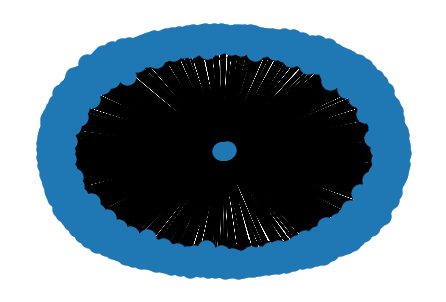

In [ ]:
DG = nx.DiGraph()

for g in range(int(len(departments_Unique_list))):
    try:
      DG.add_edge('ООО "Мегасофт"', departments_Unique_list[g]) 
      for i in range(int(len(persons_Unique_list))):
          DG.add_edge(departments_Unique_list[g], persons_Unique_list[i])  
          for t in range(425): #int(len(persons_Unique_list))):
                DG.add_edge(persons_Unique_list[g], tasks_Unique_list[t])
    except IndexError:
      continue

nx.draw(DG, with_labels=False, font_weight='k')

In [ ]:
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value

In [ ]:
departments_Unique_list

['Отдел проектирования',
 'Административно-хозяйственный отдел',
 'Отдел тестирования',
 'Отдел разработки систем',
 'Бухгалтерия',
 'Отдел архитектуры',
 'Служба ИТ',
 'Отдел эксплуатации']

In [ ]:
voc = {'ООО "Мегасофт"':""}
voc.keys()

dict_keys(['ООО "Мегасофт"'])

In [ ]:
voc['ООО "Мегасофт"'] = departments_Unique_list

In [ ]:
{'Административно-хозяйственный отдел':["Исаев", "Чертов", "Гагарин"]}

{'Административно-хозяйственный отдел': ['Исаев', 'Чертов', 'Гагарин']}

In [ ]:
persons = {"Граф":{'ООО "Мегасофт"':
              {'Отдел проектирования':["Иванов", "Петров", "Мун"]},
              {'Административно-хозяйственный отдел': ["Исаев", "Чертов","Гагарин"]},
              {'Отдел тестирования': ['Маринов']},
              {'Отдел разработки систем': ["Жопин"]}
           }
          }

In [ ]:
persons = {"Граф":{'ООО "Мегасофт"':
              {'Отдел проектирования':["Иванов", "Петров", "Мун"]},
              {'Административно-хозяйственный отдел': ["Исаев", "Чертов","Гагарин"]}
           }
          }

SyntaxError: ignored

In [ ]:
voc = {"Отделы": {"IT":{"Paul":{"developing":""}},
                 "Fin": {"Jack":{"selling":""}},
                 "Dev":{"Mary": {"coding":""}}
                 }
       }

In [ ]:
list(voc.keys())

['Отделы']

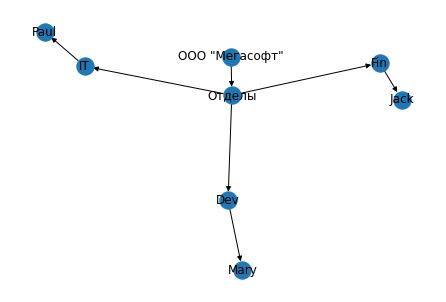

In [ ]:
DG = nx.DiGraph()

for k,v in voc.items():
  DG.add_edge('ООО "Мегасофт"', k)
  for dep, sotr in v.items():
    DG.add_edge( k, dep)
    for resp, _ in sotr.items():
      DG.add_edge(dep, resp)
      for res


nx.draw(DG, with_labels=True)

In [ ]:
DG = nx.DiGraph()

for main_1, value in voc.items():
  DG.add_edge('ООО "Мегасофт"', main_1)

  for main_2, dep in value.items():
    DG.add_edge(main_1, main_2)
    
    for main_3, sotr in dep.items():
      DG.add_edge(main_2, main_3)

      for main_4, _ in sotr.items():
        DG.add_edge(main_3, main_4)

pos = graphviz_layout(, prog="twopi")
nx.draw(T, pos)
plt.show()

SyntaxError: ignored

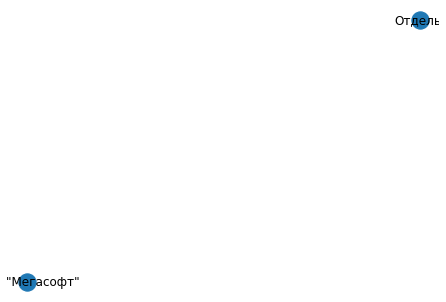

In [ ]:
pos = {'ООО "Мегасофт"': (1, 1), 'Отделы': (2,5)} 
DG = nx.DiGraph()


DG.add_node('ООО "Мегасофт"')
DG.add_node('Отделы')

    
nx.draw(DG, pos=pos, with_labels=True)

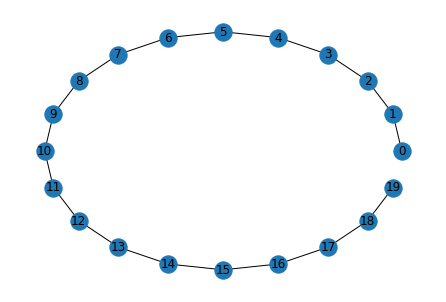

In [ ]:
import networkx as nx
import numpy as np

G = nx.path_graph(20)  # An example graph
center_node = 'ООО "Мегасофт"'  # Or any other node to be in the center
edge_nodes = set(G) - {center_node}
# Ensures the nodes around the circle are evenly distributed
pos = nx.circular_layout(G.subgraph(edge_nodes))
pos[center_node] = np.array([0, 0])  # manually specify node position
nx.draw(G, pos, with_labels=True)

In [ ]:
DG.add_edge('ООО "Мегасофт"', list(voc.keys())[0])
nx.draw(DG, with_labels=True)

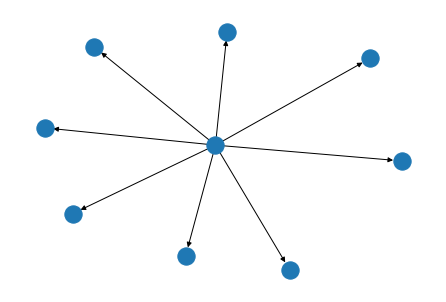

In [ ]:
DG = nx.DiGraph()

DG.add_edge('ООО "Мегасофт"', departments_Unique_list[0])
for dep in range(len(departments_Unique_list)):
  DG.add_edge('ООО "Мегасофт"', departments_Unique_list[dep]) 


"""
for g in range(int(len(departments_Unique_list))):
    try:
      DG.add_edge('ООО "Мегасофт"', departments_Unique_list[g]) 
      for i in range(int(len(departments_Unique_list))):
          DG.add_edge(departments_Unique_list[g], persons_Unique_list[i])  
        
    except IndexError:
      continue
"""
nx.draw(DG, with_labels=False, font_weight='k')